In [213]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

In [214]:
a_o = 0.289
a_i = 0.7
T_o = 293
T_i = 260
a = albedo

## Part A

##### Define a Function

In [215]:
def albedo(T):
    if T <= T_i:
        return a_i
    elif T_i < T < T_o:
        return (a_o + (a_i-a_o)*(((T-T_o)**2)/((T_i-T_o)**2)))
    elif T>=T_o:
        return a_o

##### Calculate Albedo for T=250 K to T=300K

In [216]:
Planetary_Temps = np.linspace(250,300, 100)
results = []
Planetary_Temps
for T in Planetary_Temps:
    results.append(albedo(T))

##### Results

In [217]:
global_mean_temp = 288

Text(0.5, 1.0, 'Albedo as a Function of Global Mean Temperature')

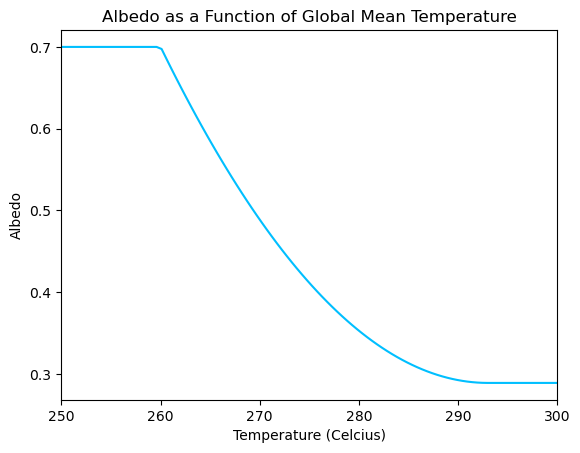

In [218]:
fig, ax = plt.subplots()
ax.margins(x=0)
ax.plot(Planetary_Temps, results, 'deepskyblue')
ax.set_xlabel('Temperature (Celcius)')
ax.set_ylabel('Albedo')
ax.set_title('Albedo as a Function of Global Mean Temperature')

## Part B

In [219]:
M = 2
solarconstant = 1366
stefanboltzmann = 5.670374419e-8
heatcapacity = 4.0e8
epsilon_new = 0.8

In [220]:
def new_temp(t,u):
    f=np.zeros((M,))
    f[0] = (solarconstant * (1-albedo(u[1]))/4 - epsilon_new*stefanboltzmann*(u[0]**4) - (1-epsilon_new)*stefanboltzmann*(u[1]**4))/heatcapacity
    f[1] = (solarconstant * (1-albedo(u[1]))/4 + epsilon_new*stefanboltzmann*(u[0]**4) - stefanboltzmann*(u[1]**4))/heatcapacity
    return f
u0 = [244,288]
t0 = 0

In [221]:
Dt = 60*60*365*24
tmax = 100*Dt
t = np.arange(t0,tmax,Dt)

In [222]:
solve_new_temp = solve_ivp(new_temp, [t0,tmax], u0, method='RK45', t_eval=t)

In [223]:
T_New = solve_new_temp.y[1,-1]
T_Old = 288.2738
Temp_Diff = T_New - T_Old
print("The temperature difference is %0.4f K with an original temperature of %0.4f K and a final temperature of %0.4f degrees." % (Temp_Diff, T_Old, T_New))

The temperature difference is 2.3042 K with an original temperature of 288.2738 K and a final temperature of 290.5780 degrees.
